1. [Load modules](#Load-modules)
1. [Load data](#Load-data)
1. [Average](#Average)
1. [Fisher](#Fisher)
1. [Ellipse plots](#Ellipse-plots)
1. [Error analysis](#Error-analysis)

# Load modules

In [1]:
#Set warnings to show always
import warnings
warnings.filterwarnings('always')

In [2]:
#Author: Shadab Alam : salam@roe.ac.uk
#Create a file to list all the parameters of cosmology in Abacus simulation
from __future__ import print_function

#####importing the necessary libraries
#To make the plots inline 
#otherwise it will make seperate figure
%matplotlib inline 
#for high resolution plot outputs
%config InlineBackend.figure_format = 'retina'

import numpy as np

import os
import sys

#latex display
from IPython.display import Latex


####plottinng library and setting
import pylab as pl
import matplotlib
from chainconsumer import ChainConsumer
import itertools
import pandas as pd

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

# Load data

In [3]:
def GetAbacus_param(simnum=0,rootdir='',hod='default',hod_sign=None,real=0,
                    boxsize=720,redshift='z0.100'):
    '''Reads the parameters for sim num from a file list'''
    #parlist_file=rootdir+'AbacusCosmos_%dbox_cosmo.parlist'%(boxsize)
    parlist_file='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist'
    #dictionary to hold parameters and returns
    pardic={}
    
    #read param lists
    lines=open(parlist_file).readlines()
    for tt,tline in enumerate(lines):
        if('#params' in tline):
            plist_str=tline[:-1].split(':')[-1]
            tspl_plist=plist_str.split(',')
            break
    
    if(simnum=='planck'):
        simname=simnum
        for tt,tline in enumerate(lines):
            if('#planck' in tline):
                tspl=tline.split()
                for ii, par in enumerate(tspl_plist):
                    if(ii==0):
                        pardic[par]=simnum
                    else:
                        pardic[par]=np.float(tspl[ii])
    else:
        simname=str(simnum).zfill(2)
        #load the values of parameters
        data=np.loadtxt(parlist_file)
        #select the appropriate sim
        ind_sel=np.where(data[:,0]==simnum)[0][0]
        #populate the dictionary for selected sim num

        for ii, par in enumerate(tspl_plist):
            pardic[par]=data[ind_sel,ii]

    omega_b = pardic['ombh2']*10000.0/pow(pardic['H0'],2)
    pardic['omb'] = omega_b
    
    #LOAD THE HALO PARAMETERS
    pardic,hod_tag=Get_hod_parameter(pardic,Mr=21,hod=hod,hod_sign=hod_sign)
            
    #halo_dir=halo_file(rootdir=rootdir,simname=simname,boxsize=boxsize,redshift=redshift)
    #pardic['halo_dir']=halo_dir
    
    hod_dir=['AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-',
            '_real-',
            '.gcat.rsd_zz.1pz0.100by100']
    
    clustering_dir='%sWPXIS024XI2DSMALL/%s%s%s%d%s/'%(rootdir,hod_dir[0],hod_tag,hod_dir[1],real,hod_dir[2])
#     print(clustering_dir)
    
    clustering_file=clustering_dir+simname+'-wpxis024xi2dsmall-logr.txt'
#     print(clustering_file)
    
    
    pardic['clustering_file']=clustering_file
    pardic['simname']=simname
    
    #VVF file
    #vvf_file=vvfrootdir+simname+'-vvf.txt'
    vvf_dir='%sVVF/%s%s%s%d%s/'%(rootdir,hod_dir[0],hod_tag,hod_dir[1],real,hod_dir[2])
    
    vvf_file=vvf_dir+simname+'-vvf-RF-500.txt'
    pardic['vvf_file']=vvf_file
    
    return pardic

def get_delta_HOD_par():
    delta_hod={'kappa': 0.5,'LMcut': 0.2, 'fconc': 0.3, 'LM1': 0.2,
               'fradsat':1.0,'alpha':0.5,'gammaHV':0.2,'sigma':0.2,
               'gammaIHV':0.5
              }
    
    return delta_hod


def Get_hod_parameter(dicin,Mr=21,hod='default',hod_sign=None):
    '''This return the HOD parameters'''
    if(Mr==21):
        default_hod={'kappa': 1.774774,'LMcut': 12.767838, 'fconc': 0.347520, 
                     'LM1': 13.644432,'fradsat':1.187908,'alpha':0.865306,
                     'gammaHV':1.252771,'sigma':1.131041,
               'gammaIHV':0.828841
              }
    
    delta_hod=get_delta_HOD_par()
    
    if(hod=='default' or hod_sign==None):
        hod_tag='%s'%hod
    elif(hod_sign!=None):
        hod_tag='%s-%s'%(hod,hod_sign)

    
    for tt,tkey in enumerate(default_hod.keys()):
        if(tkey in hod and hod_sign=='pos'):
            dp=delta_hod[tkey]
        elif(tkey in hod and hod_sign=='neg'): 
            dp=-delta_hod[tkey]
        else:
            dp=0
            
        dicin[tkey]=default_hod[tkey]+dp
    
    
    return dicin ,hod_tag

Mr=21
#rootdir='WPXIS024XI2DSMALL/AbacusCosmos_720box/'
rootdir='GCAT_derivative/'
#vvfrootdir='VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21.gcat.rsd_zz.1pz0.100by100/'
a = GetAbacus_param(simnum='planck',rootdir=rootdir,hod='default',hod_sign=None,real=0,
                boxsize=720,redshift='z0.100')

res=Get_hod_parameter({},Mr=21,hod='default',hod_sign='pos')
print(res[0].keys())
print(res)

dict_keys(['kappa', 'LMcut', 'fconc', 'LM1', 'fradsat', 'alpha', 'gammaHV', 'sigma', 'gammaIHV'])
({'kappa': 1.774774, 'LMcut': 12.767838, 'fconc': 0.34752, 'LM1': 13.644432, 'fradsat': 1.187908, 'alpha': 0.865306, 'gammaHV': 1.252771, 'sigma': 1.131041, 'gammaIHV': 0.828841}, 'default')


<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()


In [4]:
def load_clustering(simnum,rootdir='',hod='default',hod_sign=None,real=0): 
    '''loads the clustering measurements'''
    
    #first load the basic parameters
    res_dic=GetAbacus_param(simnum=simnum,rootdir=rootdir,hod=hod,hod_sign=hod_sign,real=real,
                            boxsize=720,redshift='z0.100')
    
    #print('fname:',res_dic['clustering_file'])
    res_dic['xidata']=np.loadtxt(res_dic['clustering_file'])
    
    #loading the details of data vector header
    tmpline=open(res_dic['clustering_file'],'r').readlines()
    ngot=0
    for ii, tline in enumerate(tmpline):
        if('#njn=' in tline):
            res_dic['njn']=np.int(tline.split()[1]);
        elif('#nwp=' in tline):
            res_dic['nwp']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#nsxi=' in tline):
            res_dic['nsxi']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#nssmall=' in tline):
            res_dic['nssmall']=np.int(tline.split()[-1])
            ngot=ngot+1
        elif('#order=' in tline):
            res_dic['stats_order']=tline.split()[1:];

        
        #if(ngot>=2 and smallscale_split==0):
        #    break
        if(ngot>=5):
            break
            
    res_dic['beg_index']=0
    
    #Loading VVF here-----------------
    res_dic['vvf']=np.loadtxt(res_dic['vvf_file'])
    #loading the details of data vector header
    tmpline=open(res_dic['vvf_file'],'r').readlines()
    ngot=0
    for ii, tline in enumerate(tmpline):
        if('# stats order in row:' in tline):
            tstat=tline.split(':')[1][:-1]
            tspl=tstat.split(',')
            for tt,tmp in enumerate(tspl):
                tspl[tt]=tmp.strip()
            res_dic['stats_order']=tspl
            

        
        #if(ngot>=2 and smallscale_split==0):
        #    break
        if(ngot>=5):
            break
    #done loading VVF------------------
    
    return res_dic

def get_simkey(simnum,hod,hod_sign,real=0):
    if(hod!='default'):
        simkey='%s-%s-%s-%d'%(simnum,hod,hod_sign,real)
    else:
        simkey='%s-%s-%d'%(simnum,hod,real)
        
    return simkey

def get_HODpar_list(simnum):
    if(simnum=='planck'):
        hod_pars=['default','kappa', 'LMcut', 'fconc', 'LM1', 'fradsat', 'alpha', 'gammaHV', 'sigma', 'gammaIHV']
        hod_sign=['pos','neg']
    else:
        hod_pars=['default']
        hod_sign=[None]
    return hod_pars,hod_sign

simnum_list=['planck',3,37,10,13,16,26,23,31]
            

res_sims={}
real_lim=[0,10]


for ss,simnum in enumerate(simnum_list):
    hod_pars,hod_sign_list=get_HODpar_list(simnum)
        
    for hh,hod in enumerate(hod_pars):
        for ss,hod_sign in enumerate(hod_sign_list):
            if(hod=='default' and ss!=0):
                continue

#             print(simnum,hod,hod_sign)
            for real in range(real_lim[0],real_lim[1]):
#                 print(get_simkey(simnum,hod,hod_sign,real=real))
                res_sims[get_simkey(simnum,hod,hod_sign,real=real)]=load_clustering(simnum,rootdir=rootdir,
                                                                      hod=hod,hod_sign=hod_sign,real=real)

            
            
print('Finished')


<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-0.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-0.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720bo

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-kappa-neg_real-1.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-kappa-neg_real-1.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMAL

<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-LMcut-neg_real-1.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-LMcut-neg_real-2.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos

<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-fconc-neg_real-3.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-fconc-neg_real-4.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-LM1-neg_real-2.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-LM1-neg_real-2.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/Ab

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-fradsat-neg_real-1.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-fradsat-neg_real-1.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2D

<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-alpha-neg_real-2.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-alpha-neg_real-3.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-gammaHV-neg_real-3.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-gammaHV-neg_real-3.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2D

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-sigma-neg_real-4.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-sigma-neg_real-4.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMAL

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-gammaIHV-neg_real-6.gcat.rsd_zz.1pz0.100by100/planck-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-gammaIHV-neg_real-6.gcat.rsd_zz.1pz0.100by100/planck-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-7.gcat.rsd_zz.1pz0.100by100/37-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-7.gcat.rsd_zz.1pz0.100by100/37-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosm

<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-8.gcat.rsd_zz.1pz0.100by100/13-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-8.gcat.rsd_zz.1pz0.100by100/13-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosm

Finished


<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-9.gcat.rsd_zz.1pz0.100by100/26-wpxis024xi2dsmall-logr.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['clustering_file'],'r').readlines()
<ipython-input-4-417290bfc5ef>:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/VVF/AbacusCosmos_720box_rockstar_halos_z0.100_Mr21_hod-default_real-9.gcat.rsd_zz.1pz0.100by100/26-vvf-RF-500.txt' mode='r' encoding='UTF-8'>
  tmpline=open(res_dic['vvf_file'],'r').readlines()
<ipython-input-3-450cd56dee09>:10: ResourceWarning: unclosed file <_io.TextIOWrapper name='WPXIS024XI2DSMALL/AbacusCosmos_720box/AbacusCosmos_720box_cosmo.parlist' mode='r' encoding='UTF-8'>
  lines=open(parlist_file).readlines()
<ipython-input-4-417290bfc5ef>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='GCAT_derivative/WPXIS024XI2DSMALL/AbacusCosm

# Covariance matrix

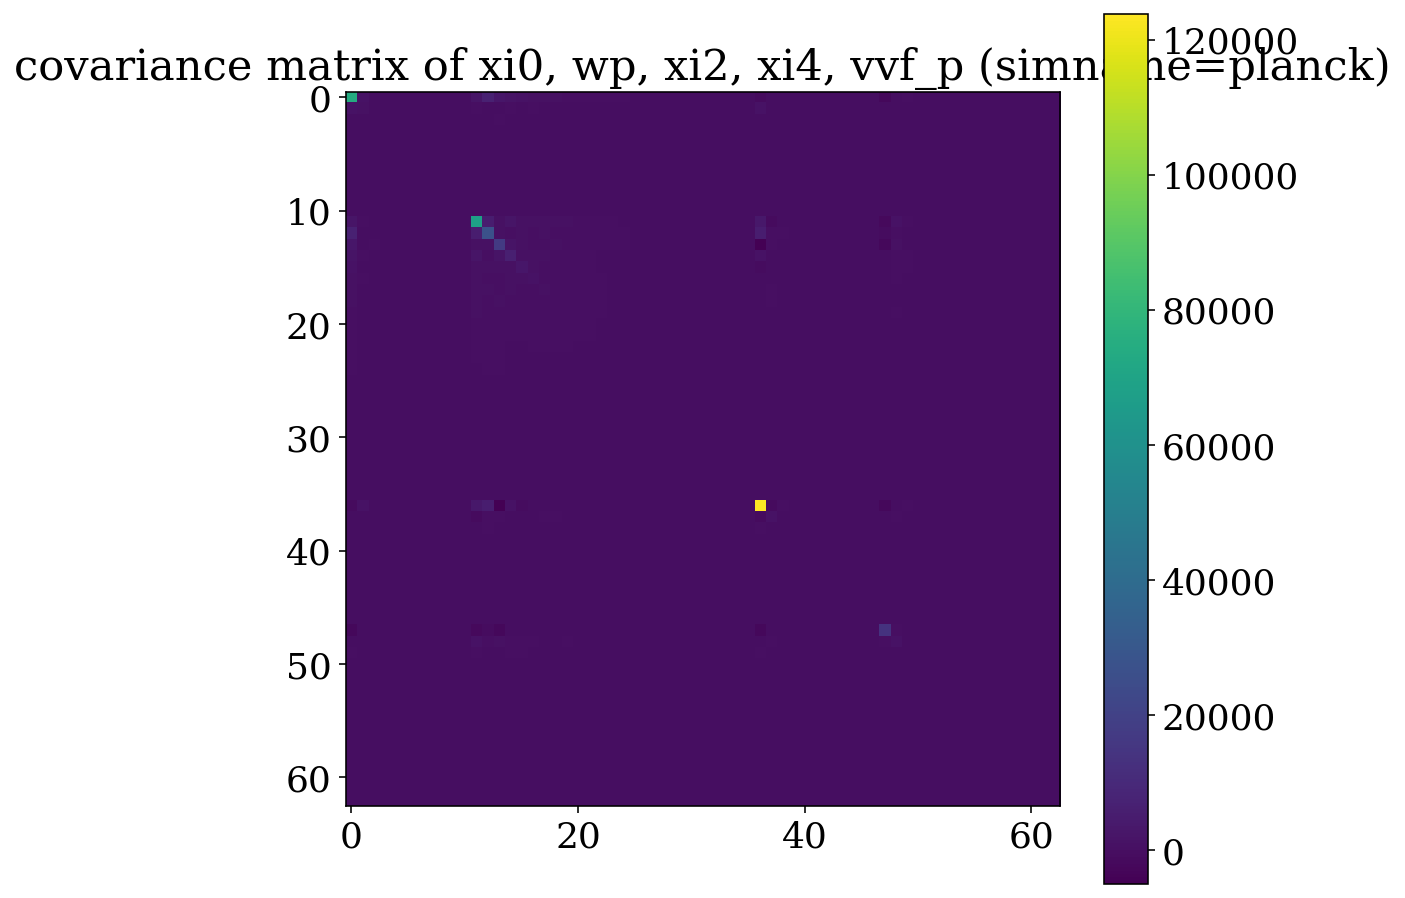

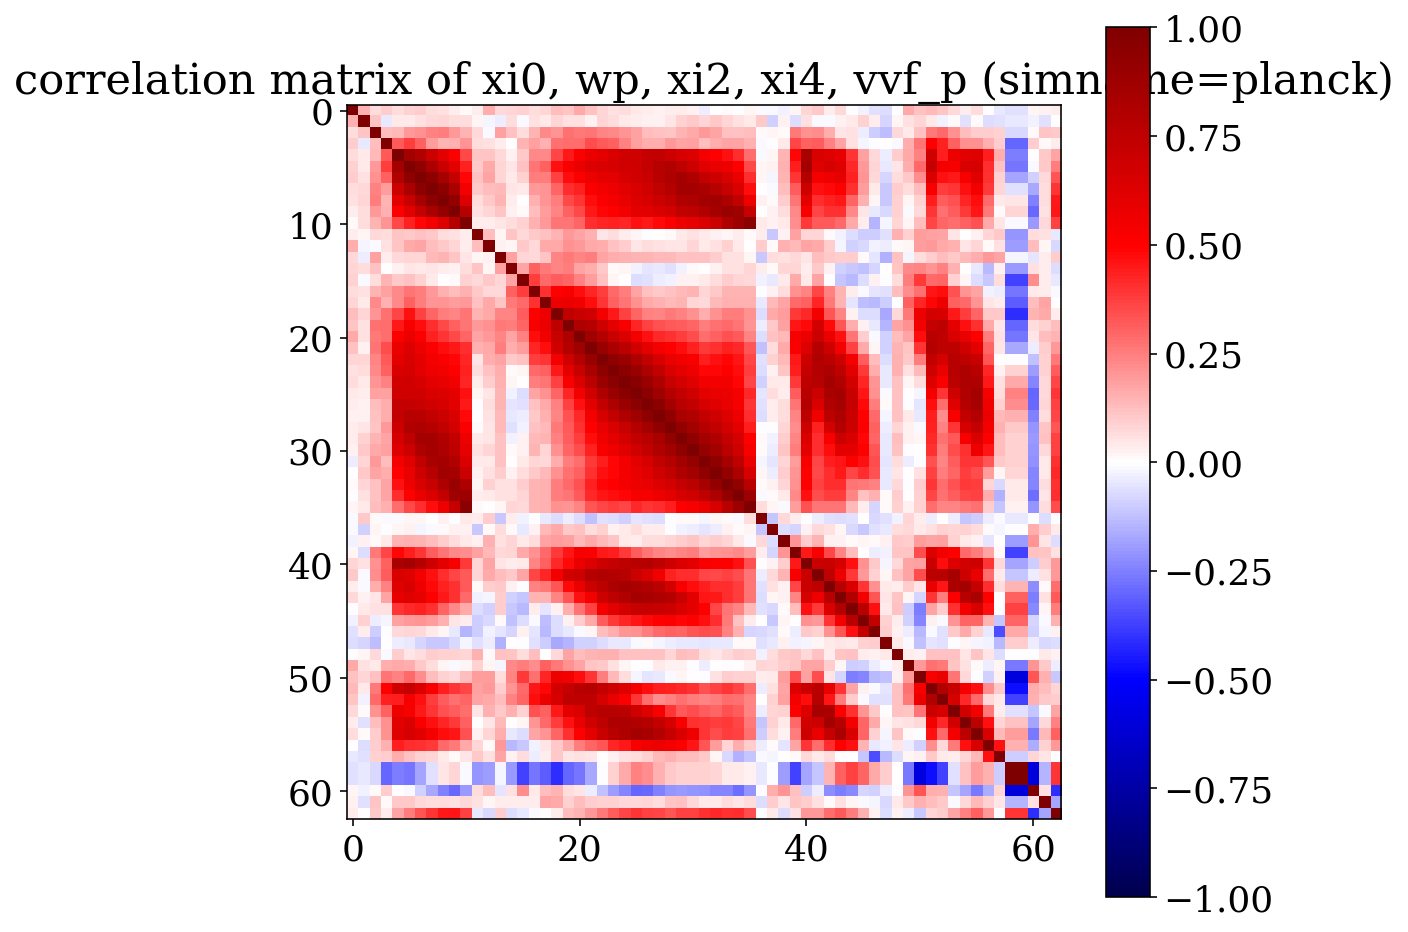

In [5]:
#15/04/2020
#Last updated: 22/07/2020
def calculate_cross_cov_corr(sim_dic, statlist, r=None, plotcov=False, saveplot=False, 
                                analysis_dir=None, bi_ei=None, hide_corr=False):
    '''
    Plot and save cross-covariance and cross-correlation matrices
    Input:
    --------
    sim_dic: A dictionary with simulation parameters and xidata
    statlist: list of statistics between whome cross-correlation matrix is to be constructed
    r: Minimum scale in Mpc/h above which the correlation matrix is to be calculated
    plotcov: Whether to plot covariance matrix
    saveplot: Whether to save the plots (plots will not be displayed if True)
    analysis_dir: Directory to save the plots
    bi_ei: Dictonary of form {'statname': [bi,ei]} with begin and end index for a statistic.
            Can be useful while calculating covariance matrix for different scales for different
            statistics.
    hide_corr: Do not show the correlation matrix plot (useful while looping large number of times)
    
    Return:
    --------
    Cross covariance matrix
    '''
    
    if saveplot and analysis_dir==None:
        print("Exiting the function. Please give a directory to save the plots.")
        return 4
    
    if saveplot:
        #Create necessary sub-directories
        cov_dir = analysis_dir + 'cov_matrices/'
        corr_dir = analysis_dir + 'corr_matrices/'
        if not os.path.isdir(cov_dir):
            !mkdir $cov_dir
        if not os.path.isdir(corr_dir):
            !mkdir $corr_dir
    
    #Make a dictionary of xidata segregated by statistics
    seg = {}
    if bi_ei == None:
        bi_ei = {} #begin and end index for all statistics
        
    if ('wp' in statlist) and ('wp' not in bi_ei.keys()):
        bi = sim_dic['beg_index'] 
        ei = sim_dic['beg_index'] + sim_dic['nwp']
        bi_ei['wp'] = [bi, ei]
        if r != None:
            bi_ei['wp'][0] = np.where(sim_dic['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],0] > r)[0][0]
    if 'wp' in statlist:
        seg['wp'] = sim_dic['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],4:]
        
    for ii, pole in enumerate([0,2,4]):
        if ('xi'+str(pole) in statlist) and ('xi'+str(pole) not in bi_ei.keys()):
            ind1 = sim_dic['beg_index'] + sim_dic['nwp'] + ii*(sim_dic['nssmall'] + sim_dic['nsxi'])
            ind2 = ind1 + sim_dic['nsxi'] + sim_dic['nssmall']
            bi_ei['xi'+str(pole)] = [ind1, ind2]
            if r != None:
                bi_ei['xi'+str(pole)][0] = bi_ei['xi'+str(pole)][0] + np.where(
                    sim_dic['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],0] > r)[0][0]
        if 'xi'+str(pole) in statlist:
            seg['xi'+str(pole)] = sim_dic['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],4:]
    
    if ('vvf_p' in statlist) and ('vvf_p' not in bi_ei.keys()):
        bi_ei['vvf_p'] = [1,6]
    if 'vvf_p' in statlist:
        seg['vvf_p'] = sim_dic['vvf'][bi_ei['vvf_p'][0]:bi_ei['vvf_p'][1],4:]
        
    if ('vvf_rho' in statlist) and ('vvf_rho' not in bi_ei.keys()):
        bi_ei['vvf_rho'] = [6,7]
    if 'vvf_rho' in statlist:
        seg['vvf_rho'] = sim_dic['vvf'][bi_ei['vvf_rho'][0]:bi_ei['vvf_rho'][1],4:]
        
    if ('vvf_std' in statlist) and ('vvf_std' not in bi_ei.keys()):
        bi_ei['vvf_std'] = [0,1]
    if 'vvf_std' in statlist:
        seg['vvf_std'] = sim_dic['vvf'][bi_ei['vvf_std'][0]:bi_ei['vvf_std'][1],4:]
        
    #Prepare for covariance by stacking data for given statistics
    pulm_cov = seg[statlist[0]]
    ts = statlist[0]
    for statistic in statlist[1:]:
        pulm_cov = np.row_stack([pulm_cov, seg[statistic]])
        ts = ts + ', ' + statistic
    
    #Covariance
    cova = (sim_dic['njn']-1)*np.cov(pulm_cov)
    
    if plotcov:
        pl.figure(figsize=(8,8))
        pl.imshow(cova)
        pl.colorbar()
        pl.title('covariance matrix of ' + ts + ' (simname=' + sim_dic['simname'] + ')')
        if saveplot:
            pl.savefig(cov_dir + str(sim_dic['simname']) + '.png')
            pl.close()
    
    #Correlation
    corr = np.copy(cova)
    for ii in range(0, cova.shape[0]):
        for jj in range(0, cova.shape[1]):
            corr[ii,jj] = cova[ii,jj]/(np.sqrt(cova[ii,ii])*np.sqrt(cova[jj,jj]))

    if not hide_corr:
        pl.figure(figsize=(8,8))
        pl.imshow(corr,vmin=-1,vmax=1,cmap='seismic')
        pl.colorbar()
        pl.title('correlation matrix of ' + ts + ' (simname=' + sim_dic['simname'] + ')')
    if saveplot:
        pl.savefig(corr_dir + str(sim_dic['simname']) + '.png')
        pl.close()
    return cova
        
plank = res_sims['planck-default-0']
cova=calculate_cross_cov_corr(sim_dic=plank, statlist=['xi0', 'wp', 'xi2', 'xi4', 'vvf_p'], 
                       plotcov=True, saveplot=False, hide_corr=False)

# Average

In [6]:
simnum = 'planck'
real_lim=[0,10]
statlist=['wp','xi0','xi2','xi4','vvf_std','vvf_p','vvf_rho']

def get_bi_ei(simnum, statlist, r=None, bi_ei=None):
    sim_dic = res_sims[simnum]
    if bi_ei == None:
        bi_ei = {} #begin and end index for all statistics
        
    if ('wp' in statlist) and ('wp' not in bi_ei.keys()):
        bi = sim_dic['beg_index'] 
        ei = sim_dic['beg_index'] + sim_dic['nwp']
        bi_ei['wp'] = [bi, ei]
        if r != None:
            bi_ei['wp'][0] = np.where(sim_dic['xidata'][bi_ei['wp'][0]:bi_ei['wp'][1],0] > r)[0][0]
        
    for ii, pole in enumerate([0,2,4]):
        if ('xi'+str(pole) in statlist) and ('xi'+str(pole) not in bi_ei.keys()):
            ind1 = sim_dic['beg_index'] + sim_dic['nwp'] + ii*(sim_dic['nssmall'] + sim_dic['nsxi'])
            ind2 = ind1 + sim_dic['nsxi'] + sim_dic['nssmall']
            bi_ei['xi'+str(pole)] = [ind1, ind2]
            if r != None:
                bi_ei['xi'+str(pole)][0] = bi_ei['xi'+str(pole)][0] + np.where(
                    sim_dic['xidata'][bi_ei['xi'+str(pole)][0]:bi_ei['xi'+str(pole)][1],0] > r)[0][0]
    
    if ('vvf_p' in statlist) and ('vvf_p' not in bi_ei.keys()):
        bi_ei['vvf_p'] = [1,6]
    
    if ('vvf_rho' in statlist) and ('vvf_rho' not in bi_ei.keys()):
        bi_ei['vvf_rho'] = [6,7]
        
    if ('vvf_std' in statlist) and ('vvf_std' not in bi_ei.keys()):
        bi_ei['vvf_std'] = [0,1]
    
    return bi_ei

def average_measurements(simnum, statlist, real_lim, r=None):
    hod_pars, hod_sign_list = get_HODpar_list(simnum)

    for hh, hod in enumerate(hod_pars):
        for ss, hod_sign in enumerate(hod_sign_list):
            if(hod=='default' and ss!=0):
                continue
            
            bi_ei_key = get_simkey(simnum,hod,hod_sign,real=0)
            bi_ei = get_bi_ei(bi_ei_key, statlist, r=r)
            
            for real in range(real_lim[0],real_lim[1]):
                simkey = get_simkey(simnum,hod,hod_sign,real=real)
                if real == 0:
                    avg_cova = calculate_cross_cov_corr(res_sims[simkey], 
                                statlist=statlist, hide_corr=True, r=r)
                    avg_xi = res_sims[simkey]['xidata'][:,:2]
                    avg_vvf = res_sims[simkey]['vvf'][:,:2]
                else:
                    avg_cova = (avg_cova + calculate_cross_cov_corr(res_sims[simkey], 
                                statlist=statlist, hide_corr=True, r=r))/2.0
                    avg_xi = (avg_xi + res_sims[simkey]['xidata'][:,:2])/2.0
                    avg_vvf = (avg_vvf + res_sims[simkey]['vvf'][:,:2])/2.0

            new_simkey = simkey[:-2]
            res_sims_avg[new_simkey] = {}
            res_sims_avg[new_simkey]['covariance'] = avg_cova
            res_sims_avg[new_simkey]['statlist'] = statlist
            res_sims_avg[new_simkey]['bi_ei'] = bi_ei
            for stat in statlist:
                if 'vvf' not in stat:
                    res_sims_avg[new_simkey][stat] = np.array(avg_xi[bi_ei[stat][0]:bi_ei[stat][1],:])
                elif 'vvf' in stat:
                    res_sims_avg[new_simkey][stat] = np.array(avg_vvf[bi_ei[stat][0]:bi_ei[stat][1],:])
            for original_param in res_sims[simkey].keys():
                if original_param not in ['xidata', 'vvf']:
                    res_sims_avg[new_simkey][original_param] = res_sims[simkey][original_param]
    
    return res_sims_avg

# Fisher

In [7]:
def seg_stats_paramdict(simnumlist, paramlist, statlist):
    paramdict = {}
    statistics = []
    
    for simnum in simnumlist:
        sim_dict = res_sims_avg[simnum]
        cur_stat_vector = sim_dict[statlist[0]][:,1]
        for stat in statlist[1:]:
            cur_stat_vector = np.append(cur_stat_vector, sim_dict[stat][:,1])
        statistics.append(cur_stat_vector)
        for param in paramlist:
            paramdict.setdefault(param, []).append(sim_dict[param])
            
    return paramdict, np.array(statistics)

def calculate_cosmo_derivatives(simnumlist, paramlist, statlist, ref_simnum='planck-default'):
    ref_paramdict, ref_combined_stats = seg_stats_paramdict([ref_simnum], paramlist, statlist)
    paramdict, combined_stats = seg_stats_paramdict(simnumlist, paramlist, statlist)
    
    derivative_matrix = []
    for r_scale in range(len(combined_stats[0])):
        nparam = len(paramlist)
        T_dash = combined_stats[:,r_scale] - ref_combined_stats[:,r_scale]
        theta = np.empty([nparam, nparam])
        for i, param in enumerate(paramlist):
            theta[:,i] = np.array(paramdict[param]) - np.array(ref_paramdict[param])
        derivative_matrix.append(np.linalg.solve(theta, T_dash))

    derivative_matrix = np.array(derivative_matrix)
    
    return derivative_matrix

def calculate_HOD_derivatives(simnum, paramlist, statlist):
    derivative_matrix = []
    
    for param in paramlist:
        statdict = {}
        simkeys = [get_simkey(simnum, param, 'pos')[:-2], simnum + '-' + 'default', 
                   get_simkey(simnum, param, 'neg')[:-2]]
        paramvec = np.array([res_sims_avg[simkeys[0]][param], res_sims_avg[simkeys[1]][param], 
                    res_sims_avg[simkeys[2]][param]])
        
        #Make statdict with rows having statistic values for particular simkey and columns being scales
        for stat in statlist:
            statdict[stat] = np.array([res_sims_avg[simkeys[0]][stat][:,1]])
            for simkey in simkeys[1:]:
                statdict[stat] = np.vstack((statdict[stat], np.array([res_sims_avg[simkey][stat][:,1]])))
                
        #Calculate derivative for each statistic
        cur_der_vector = np.polyfit(paramvec, np.array(statdict[statlist[0]]), 1)[0,:]
        for stat in statlist[1:]:
            cur_der_vector = np.append(cur_der_vector, np.polyfit(paramvec, np.array(statdict[stat]), 1)[0])
        derivative_matrix.append(cur_der_vector)
        
    return np.array(derivative_matrix).T

In [10]:
#Last modified for HOD parameters on 13/09/2020
def generate_fisher_matrix(sim_dic, simnumlist, statlist, physical=True, include_hod=False, paramlist=None,
                           hide_corr=True, silent=False):
    '''
    Plot correlation matrix and generate Fisher matrix for given simulation
    Input:
    --------
    sim_dic: A dictionary with simulation parameters and xidata
    simnumlist: List of simnums of interest
    statlist: List of statistics of interest
    physical: Use physical densities if True
    paramlist: List of parameters of interest
    r: Minimum scale in Mpc/h above which the calculations are to be done
    bi_ei: Dictonary of form {'statname': [bi,ei]} with begin and end index for a statistic.
            Can be useful when different scales are considered for different statistics.
    hide_corr: Do not show the correlation matrix plots.
    silent: Prints scales used for various parameters and shape of various matrix when False (default). 
            Does not print anything if True.
    
    Return:
    --------
    Fisher matrix, list of parameters and latex list of parameter that can be used as labels
    '''
    
    if physical == True:
        paramlist = ['H0', 'ns', 'ombh2', 'omch2', 'sigma_8', 'w0']
        plot_paramlist = ['$H_0$', '$ns$', '$\Omega_bh^2$', '$\Omega_{CDM}h^2$', '$\sigma_8$', '$w_0$']
    elif physical == False:
        paramlist = ['H0', 'Omega_M', 'ns', 'sigma_8', 'w0', 'omb']
        plot_paramlist = ['$H_0$', '$\Omega_M$', '$ns$', '$\sigma_8$', '$w_0$', '$\Omega_b$']
    
    #Inverse to be used in Fisher calculation
    cova_inv = np.linalg.inv(sim_dic['covariance'])
    if not silent:
        print("Shape of inverse covariance matrix =", cova_inv.shape)
    
    #Calculate derivative matrix
    derivative_matrix = calculate_cosmo_derivatives(simnumlist, paramlist, statlist, ref_simnum='planck-default')
    
    if include_hod:
        hodparam = ['kappa', 'LMcut', 'fconc', 'LM1', 'fradsat', 'alpha', 'gammaHV', 'sigma', 'gammaIHV']
        hodder = calculate_HOD_derivatives('planck', hodparam, statlist)
        derivative_matrix = np.column_stack((derivative_matrix, hodder))
        paramlist = paramlist + hodparam
        plot_paramlist = plot_paramlist + hodparam
    
    if not silent:
        print("Shape of derivative matrix =", derivative_matrix.shape)
    
    temp1 = np.dot(derivative_matrix.T, cova_inv)
    fisher = np.dot(temp1, derivative_matrix)
    
    if not silent:
        print("Shape of fisher matrix =", fisher.shape)
    return fisher, paramlist, plot_paramlist

<>:30: DeprecationWarning: invalid escape sequence \O
<>:30: DeprecationWarning: invalid escape sequence \s
<>:30: DeprecationWarning: invalid escape sequence \O
<>:27: DeprecationWarning: invalid escape sequence \O
<>:27: DeprecationWarning: invalid escape sequence \O
<>:27: DeprecationWarning: invalid escape sequence \s
<>:30: DeprecationWarning: invalid escape sequence \O
<>:30: DeprecationWarning: invalid escape sequence \s
<>:30: DeprecationWarning: invalid escape sequence \O
<>:27: DeprecationWarning: invalid escape sequence \O
<>:27: DeprecationWarning: invalid escape sequence \O
<>:27: DeprecationWarning: invalid escape sequence \s
<ipython-input-10-226105d12514>:30: DeprecationWarning: invalid escape sequence \O
  plot_paramlist = ['$H_0$', '$\Omega_M$', '$ns$', '$\sigma_8$', '$w_0$', '$\Omega_b$']
<ipython-input-10-226105d12514>:30: DeprecationWarning: invalid escape sequence \s
  plot_paramlist = ['$H_0$', '$\Omega_M$', '$ns$', '$\sigma_8$', '$w_0$', '$\Omega_b$']
<ipython-i

Shape of inverse covariance matrix = (26, 26)
Shape of derivative matrix = (26, 15)
Shape of fisher matrix = (15, 15)
H0 = 67.26 +- 3.619
Omega_M = 0.314 +- 0.027
ns = 0.965 +- 0.016
sigma_8 = 0.83 +- 0.043
w0 = -1.0 +- 0.169
omb = 0.049 +- 0.006
kappa = 1.775 +- 0.872
LMcut = 12.768 +- 0.16
fconc = 0.348 +- 0.519
LM1 = 13.644 +- 0.161
fradsat = 1.188 +- 0.318
alpha = 0.865 +- 0.076
gammaHV = 1.253 +- 0.061
sigma = 1.131 +- 0.164
gammaIHV = 0.829 +- 0.142


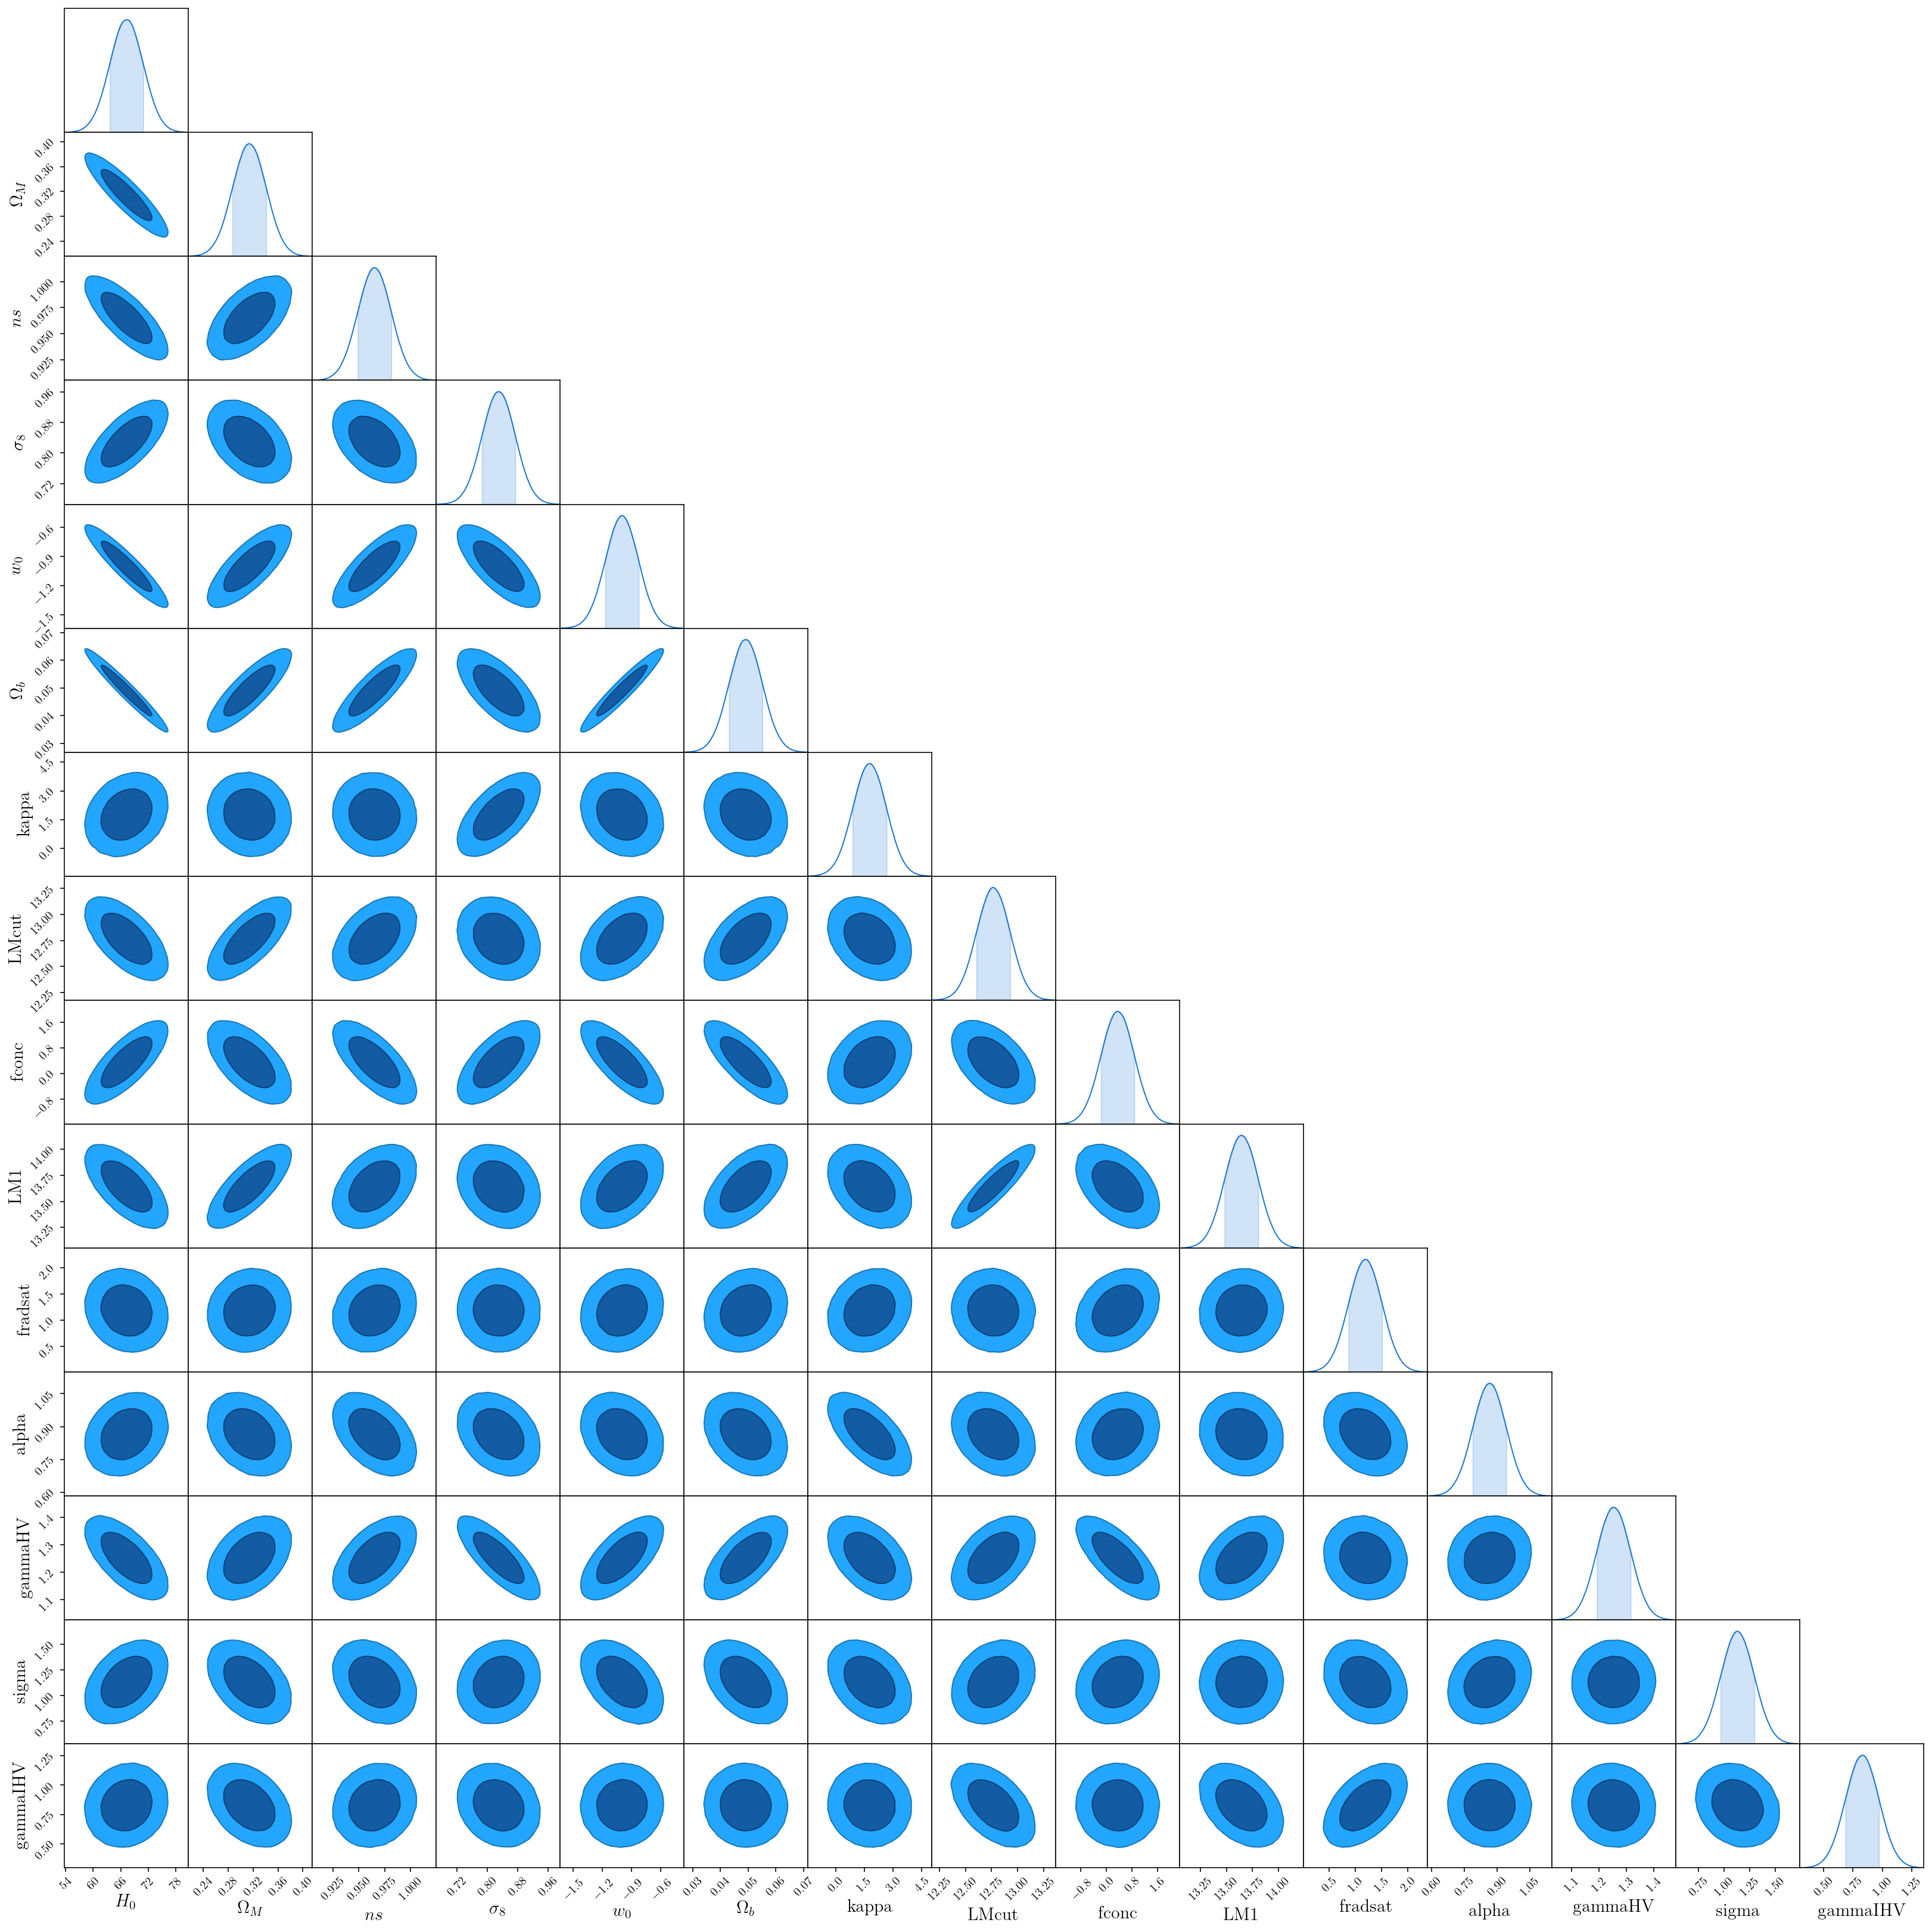

In [32]:
real_lim=[0,10]
statlist=['wp','xi0', 'xi2', 'xi4']
simnum_list=['planck', 3, 37, 10, 13, 16, 26]

res_sims_avg = {}
for simnum in simnum_list:
    average_measurements(simnum, statlist, real_lim, r=2)
    
res_sims_avg.keys()


simnumlist = ['3-default', '37-default', '10-default', '13-default', '16-default', '26-default']
# hodparam = ['kappa', 'LMcut', 'fconc', 'LM1', 'fradsat', 'alpha', 'gammaHV', 'sigma', 'gammaIHV']
plank = res_sims_avg['planck-default']
fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=simnumlist, 
                                                       statlist=statlist, physical=False, include_hod=True)

covmat = np.linalg.inv(fisher)

for i in range(covmat.shape[0]):
    print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))

c = ChainConsumer()
c.add_covariance([plank[paramlist[0]], plank[paramlist[1]], plank[paramlist[2]], plank[paramlist[3]], 
                  plank[paramlist[4]], plank[paramlist[5]], plank[hodparam[0]], plank[hodparam[1]],
                  plank[hodparam[2]], plank[hodparam[3]], plank[hodparam[4]], plank[hodparam[5]],
                  plank[hodparam[6]], plank[hodparam[7]], plank[hodparam[8]]], 
                covmat, parameters=parameters)

c.configure(label_font_size=15)
fig = c.plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())

Shape of inverse covariance matrix = (25, 25)
Shape of derivative matrix = (25, 15)
Shape of fisher matrix = (15, 15)
H0 = 67.26 +- nan
Omega_M = 0.314 +- 0.001
ns = 0.965 +- nan
sigma_8 = 0.83 +- nan
w0 = -1.0 +- 0.033
omb = 0.049 +- 0.0
kappa = 1.775 +- nan
LMcut = 12.768 +- 0.01
fconc = 0.348 +- 0.544
LM1 = 13.644 +- nan
fradsat = 1.188 +- nan
alpha = 0.865 +- 0.022
gammaHV = 1.253 +- 0.012
sigma = 1.131 +- 0.028
gammaIHV = 0.829 +- nan


<ipython-input-33-451f79f0a779>:22: RuntimeWarning: invalid value encountered in sqrt
  print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))
<ipython-input-33-451f79f0a779>:22: RuntimeWarning: invalid value encountered in sqrt
  print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))
<ipython-input-33-451f79f0a779>:22: RuntimeWarning: invalid value encountered in sqrt
  print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))
<ipython-input-33-451f79f0a779>:22: RuntimeWarning: invalid value encountered in sqrt
  print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))
<ipython-input-33-451f79f0a779>:22: RuntimeWarning: invalid value encountered in sqrt
  print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))


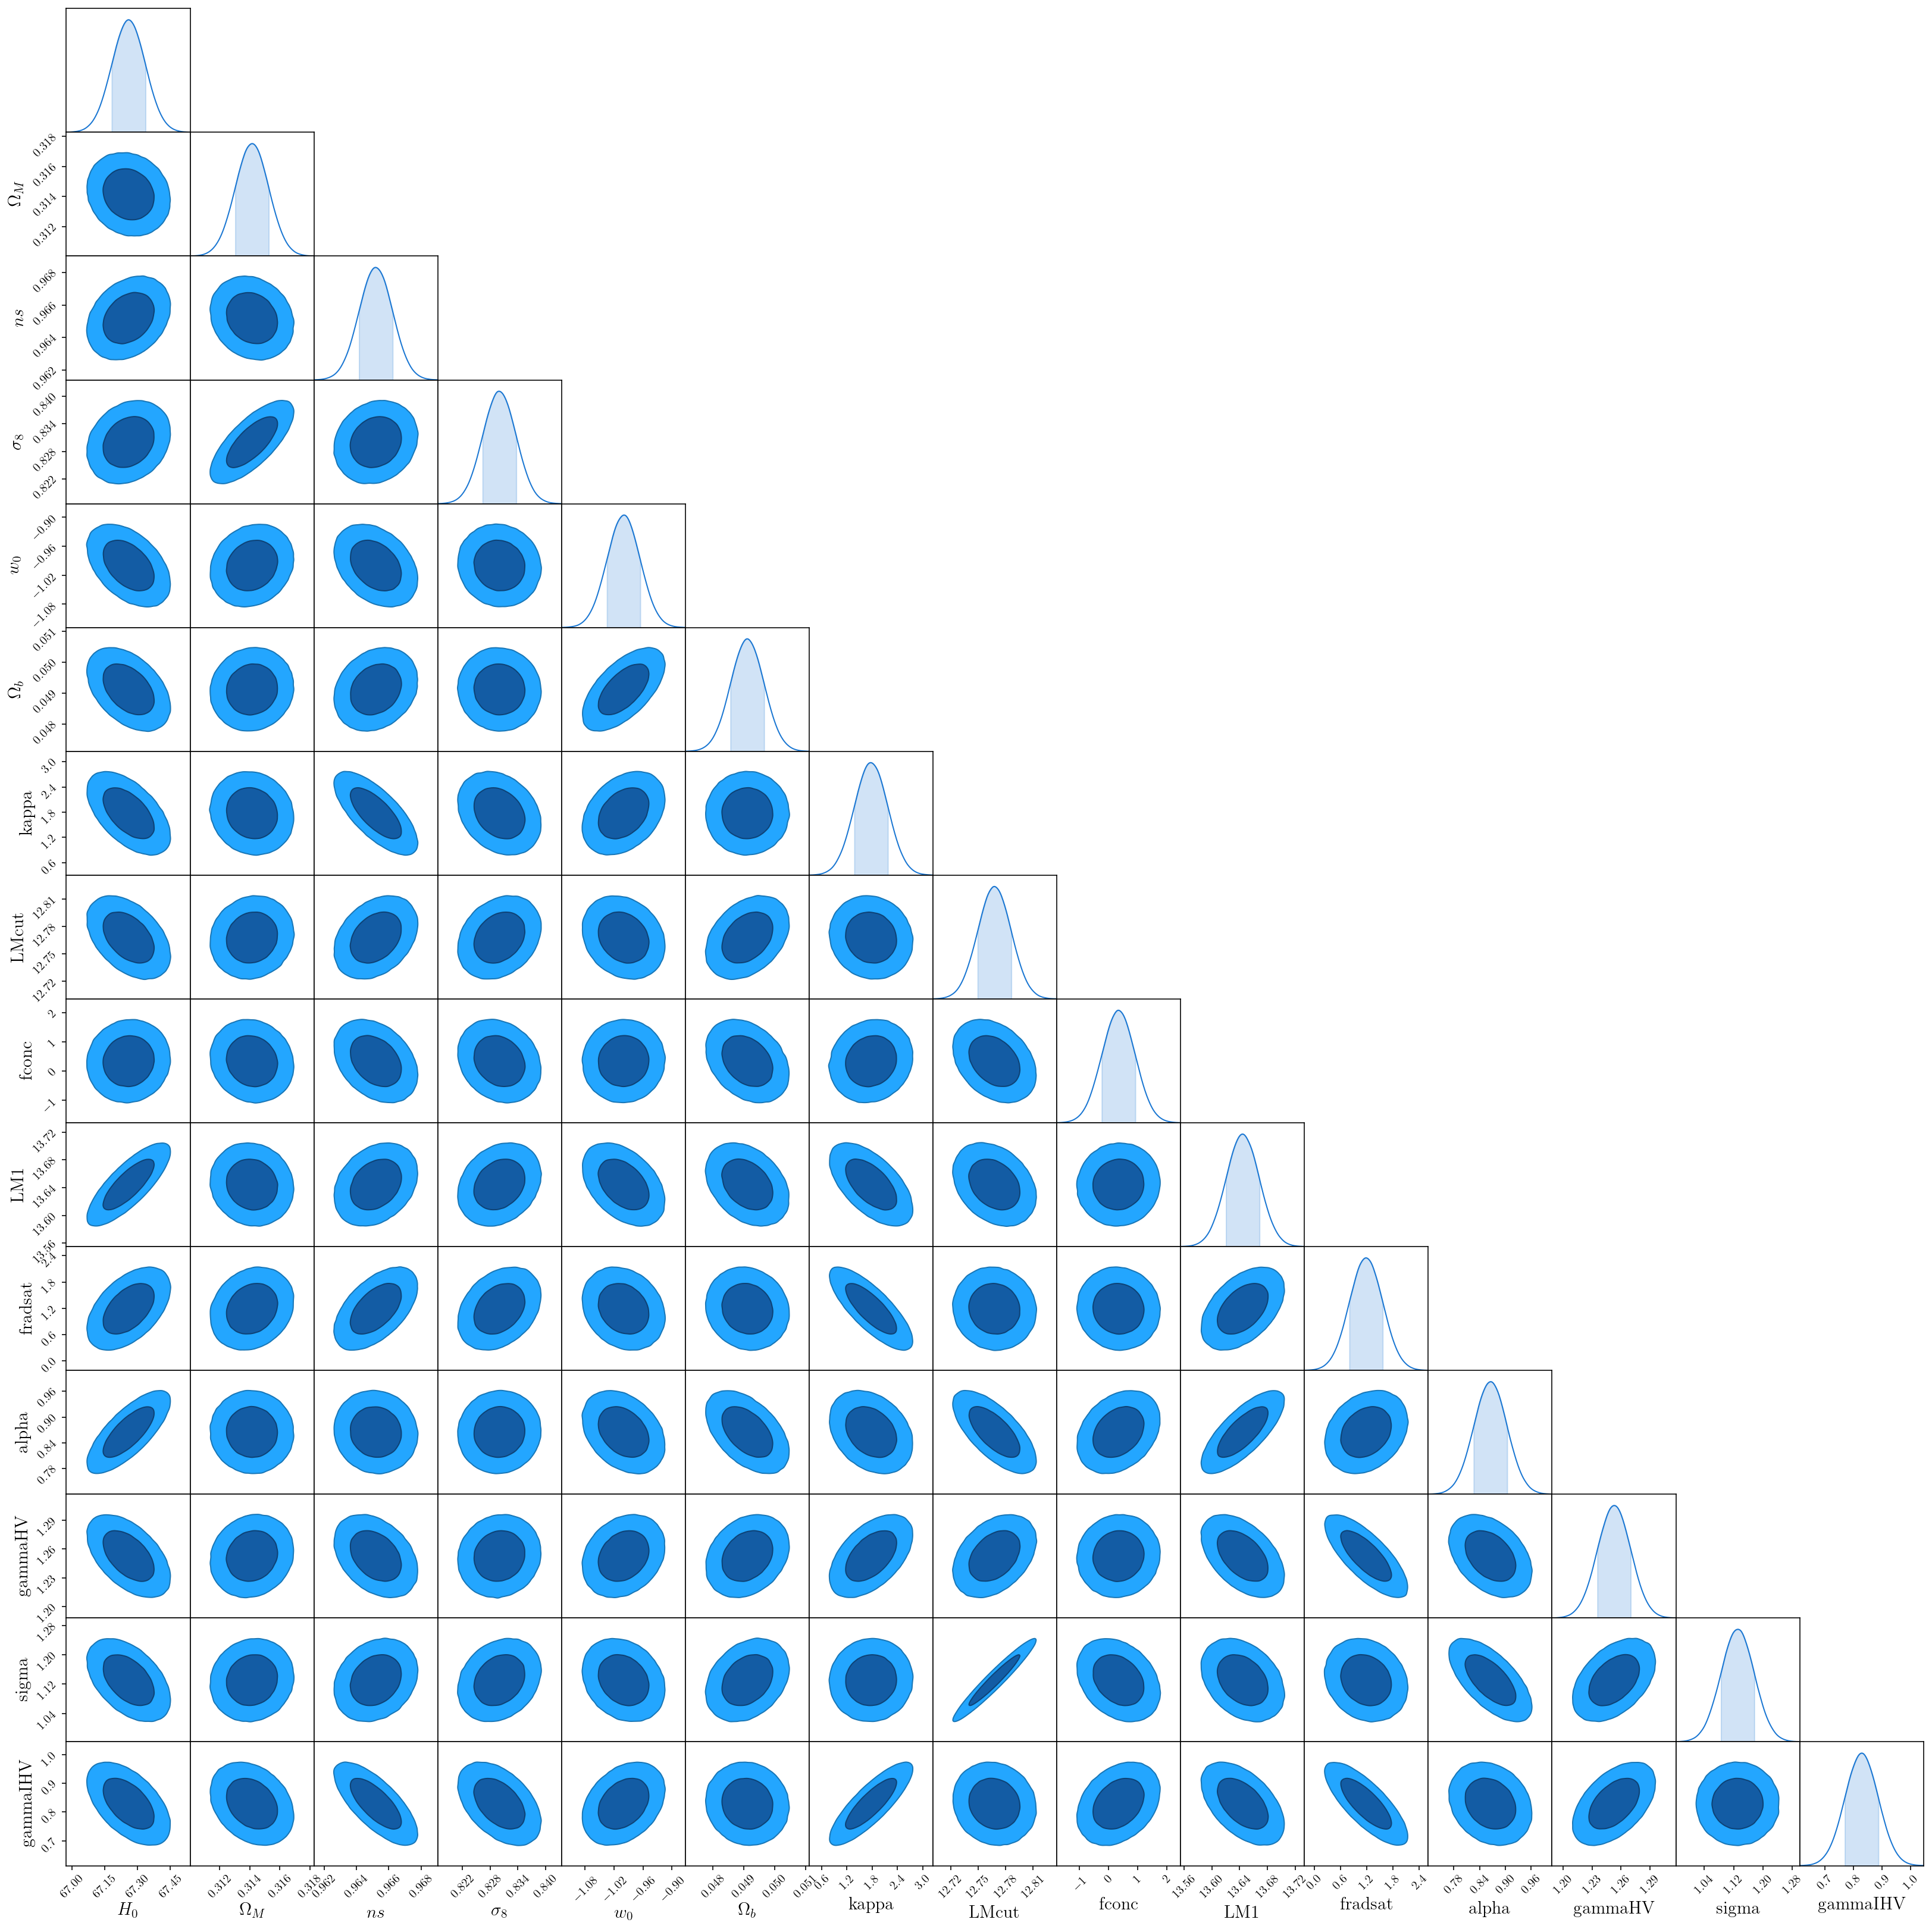

In [33]:
real_lim=[0,10]
statlist=['wp','xi0', 'xi2', 'xi4', 'vvf_p', 'vvf_rho', 'vvf_std']
simnum_list=['planck', 3, 37, 10, 13, 16, 26]

res_sims_avg = {}
for simnum in simnum_list:
    average_measurements(simnum, statlist, real_lim, r=5)
    
res_sims_avg.keys()


simnumlist = ['3-default', '37-default', '10-default', '13-default', '16-default', '26-default']
# hodparam = ['kappa', 'LMcut', 'fconc', 'LM1', 'fradsat', 'alpha', 'gammaHV', 'sigma', 'gammaIHV']
plank = res_sims_avg['planck-default']
fisher, paramlist, parameters = generate_fisher_matrix(sim_dic=plank, simnumlist=simnumlist, 
                                                       statlist=statlist, physical=False, include_hod=True)

covmat = np.linalg.inv(fisher)

# print(covmat)
for i in range(covmat.shape[0]):
    print(paramlist[i] + " = " + str(round(plank[paramlist[i]], 3)) + ' +- ' + str(round(np.sqrt(covmat[i,i]), 3)))

c = ChainConsumer()
c.add_covariance([plank[paramlist[0]], plank[paramlist[1]], plank[paramlist[2]], plank[paramlist[3]], 
                  plank[paramlist[4]], plank[paramlist[5]], plank[hodparam[0]], plank[hodparam[1]],
                  plank[hodparam[2]], plank[hodparam[3]], plank[hodparam[4]], plank[hodparam[5]],
                  plank[hodparam[6]], plank[hodparam[7]], plank[hodparam[8]]], 
                covmat, parameters=parameters)

c.configure(label_font_size=15)
fig = c.plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())